## Final Project Submission

Please fill out:
* Student name: Zachary Hyde
* Student pace: part time
* Scheduled project review date/time: to be scheduled
* Instructor name: Yish Lim
* Blog post URL:


#### Questions

1. Top 5 variables affect value property?
2. Newly renovated old homes > newly renovated young homes?
3. Does the grade column have a strong correlation to the price?
4. Houses with more than two floors = lower value ~ houses with floors having more than two floors?

## Introduction

During the analysis of data, I will be presenting to sell by owner's who want a better idea on what their property value is estimated at within the King County market of Massachusetts. Throughout this notebook, I will be explaining step-by-step what each section of code represents. My goal is to gain your business and trust in myself and abilities to accurately utilize machine learning and linear regression modeling to predict future property listing values based on multiple variables (i.e. # bedrooms, # bathrooms, living sq.ft., etc.)

## Importing necessary tools for EDA

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
plt.style.use('ggplot')

import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


## Exploring/Cleaning Dataset

In [168]:
data=pd.read_csv(('kc_house_data.csv'), index_col=0)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [169]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

I see there are two objects that will need to be transformed into an integer or float to manipulate to be user friendly when it comes time to check values of columns and compare with others. I can also see that there are some null values (NaN) that can be cleaned up, having only numerical values in place of them.

In [171]:
data['waterfront'] = data['waterfront'].fillna(0)

In [172]:
wf_houses = data[data['waterfront'] >= 1]
wf_houses['waterfront'].value_counts()

1.0    146
Name: waterfront, dtype: int64

In [173]:
data['yr_renovated']

id
7129300520       0.0
6414100192    1991.0
5631500400       NaN
2487200875       0.0
1954400510       0.0
               ...  
263000018        0.0
6600060120       0.0
1523300141       0.0
291310100        0.0
1523300157       0.0
Name: yr_renovated, Length: 21597, dtype: float64

In [174]:
data['yr_renovated'] = data['yr_renovated'].fillna('0').astype(str).astype(float)

In [175]:
data['yr_renovated']

id
7129300520       0.0
6414100192    1991.0
5631500400       0.0
2487200875       0.0
1954400510       0.0
               ...  
263000018        0.0
6600060120       0.0
1523300141       0.0
291310100        0.0
1523300157       0.0
Name: yr_renovated, Length: 21597, dtype: float64

In [176]:
data['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [178]:
data['sqft_basement']=data['sqft_basement'].astype(str).str.replace('?','0').astype(float)

In [179]:
data['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [180]:
data = data.drop('view', 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64

In [181]:
data = data.drop('date', 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64

In [182]:
# For simplicity sake, I divided the price values by 1,000 and rounded them. This makes the values much easier to work with rather than a large number

In [183]:
data['price']=round(data['price'].map(lambda x: x/1000, 2))
data['price']

id
7129300520    222.0
6414100192    538.0
5631500400    180.0
2487200875    604.0
1954400510    510.0
              ...  
263000018     360.0
6600060120    400.0
1523300141    402.0
291310100     400.0
1523300157    325.0
Name: price, Length: 21597, dtype: float64

In [184]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
7129300520,222.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,538.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,180.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
2487200875,604.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,510.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [185]:
data['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [186]:
list(data['yr_built'].value_counts()).sort()

In [187]:
#get_dummies? want to compare floor count to price of house
data['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

### Simple Linear Regression Model

Now, I will look at if the grade given to a property has a positive or negative correlation to each other with a simple linear regression model.

In [188]:
# Grade vs. Price Regression

# X = data['grade']
# y = data['price']

In [189]:
# Sqft_living vs. Price Regression

X = data['sqft_living']
y = data['price']

In [190]:
# Bedrooms vs. Price Regression

# X = data['bedrooms']
# y = data['price']

In [191]:
# Yr_renovated vs. Price
# X = data[data['yr_renovated'] >= 1]       #trying to exclude houses that didn't have renos done (20853 values)
# y = data['price']

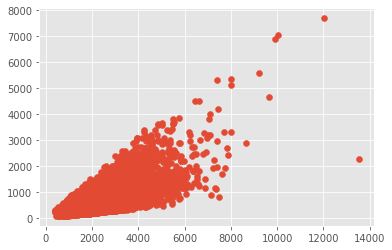

In [192]:
plt.scatter(X, y)

In [193]:
def calc_slope(xs, ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) / ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m
calc_slope(X, y)

0.2808624612358828

In [194]:
def best_fit(xs, ys):
    
    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

m, c = best_fit(X, y)
m, c

(0.2808624612358828, -43.98436595896112)

In [195]:
def reg_line (m, c, xs):
    
    return [(m*x)+c for x in xs]
regression_line = reg_line(m, c, X)

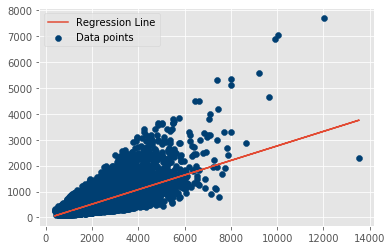

In [196]:
plt.scatter(X, y, color='#003F72', label= 'Data points')
plt.plot(X, regression_line, label= 'Regression Line')
plt.legend()

In [197]:
data_ = data.loc[:, ['price', 'grade']]
data_.head()

,price,grade
id,,
7129300520,222.0,7
6414100192,538.0,7
5631500400,180.0,6
2487200875,604.0,7
1954400510,510.0,8


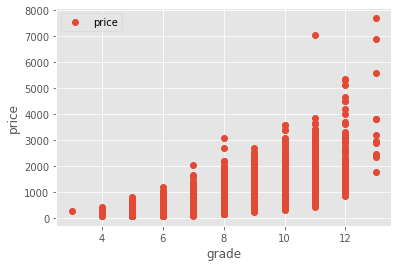

In [198]:
data.plot(x='grade', y='price', style='o')
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

It's time to divide the data into independent and dependent variables to prepare it for the train-test split.

In [199]:
X = pd.DataFrame(data['grade'])
y = pd.DataFrame(data['price'])

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.2, random_state=1)

In [201]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17277, 1)
(4320, 1)
(17277, 1)
(4320, 1)


In [202]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [203]:
print(regressor.intercept_)

[-1057.64933581]


In [204]:
print(regressor.coef_)

[[208.72634638]]


In [205]:
print(regressor.predict)

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [206]:
y_test

,price
id,
8562000010,244.0
4363700200,190.0
8165501620,348.0
8718500075,396.0
6154900005,665.0
...,...
1023059186,252.0
5423500240,194.0
6730700260,235.0


In [207]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
# x_cols = ['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot']
# x_cols = ['bathrooms', 'bedrooms', 'sqft_living', 'sqft_living15']
# x_cols = ['floors', 'grade', 'yr_built', 'yr_renovated']

### OLS Regression

In [219]:
outcome = 'price'
x_cols = ['floors', 'sqft_living', 'sqft_living15', 'bathrooms', 'bedrooms', 
          'grade', 'yr_built', 'yr_renovated', 'waterfront']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     4359.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        04:14:29   Log-Likelihood:            -1.4702e+05
No. Observations:               21597   AIC:                         2.941e+05
Df Residuals:                   21587   BIC:                         2.941e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7085.2602    126.658     55.940      0.000    6837.002    7333.519
floors           20.8899      3.445      6.064      0.000      14.138      27.642
sqft_living       0.1620      0.004     45.120      0.000       0.155       0.169
sqft_living15     0.0279      0.004      7.865      0.000       0.021       0.035
bathrooms        54.2343      3.480     15.586      0.000      47.414      61.055
bedrooms        -40.2602      2.045    -19.688      0.000     -44.268     -36.252
grade           124.6455      2.268     54.949      0.000     120.199     129.092
yr_built         -4.0121      0.067    -60.215      0.000      -4.143      -3.882
yr_renovated      0.0100      0.004      2.334      0.020       0.002       0.018
waterfront      752.9038     18.402     40.913      0.000     716.834     788.974
==============================================================================
Omnibus:                    16144.301   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1095168.170
Skew:                           3.003   Prob(JB):                         0.00
Kurtosis:                      37.365   Cond. No.                     3.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

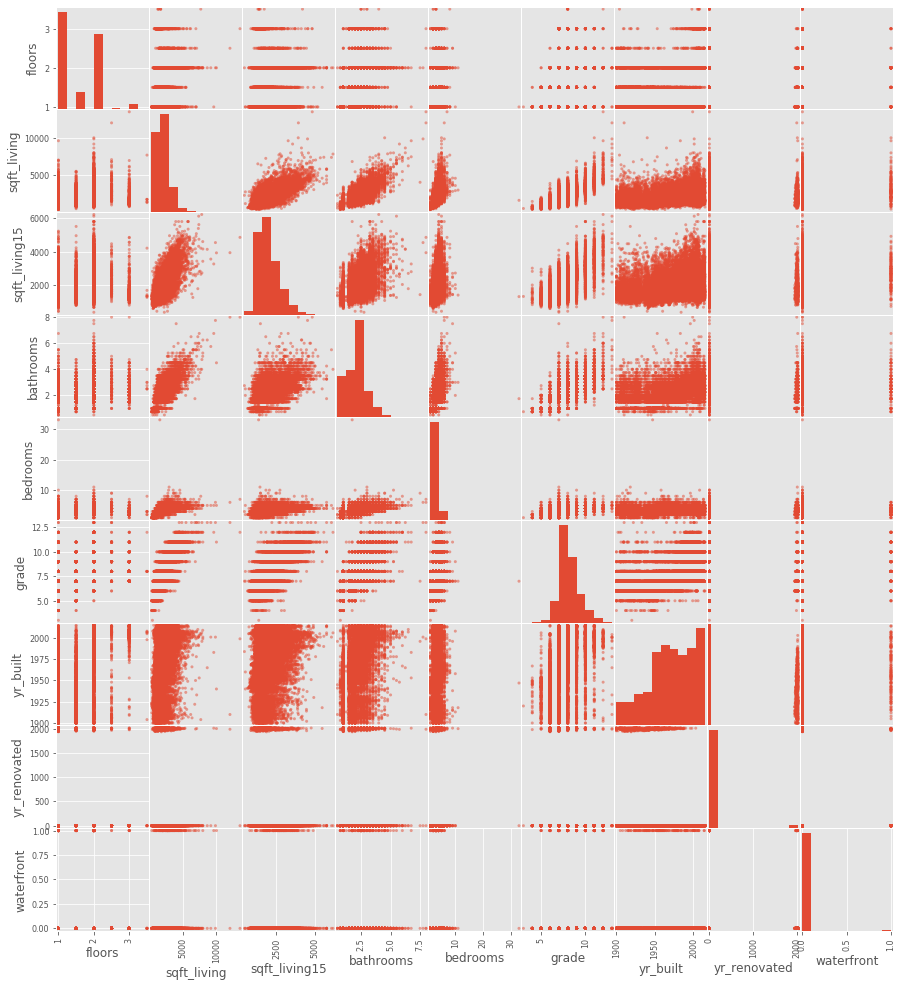

In [220]:
pd.plotting.scatter_matrix(data[x_cols], figsize=(15,17));

## Working with Categorical Data

### Creating dummies

In [ ]:
# floor_cat = pd.Series(data['floors'])
# floor_cat

In [ ]:
# pd.get_dummies(floor_cat, prefix = 'bath')

In [ ]:
# trap_data = pd.get_dummies(floor_cat, prefix = 'bath')
# trap_data

In [ ]:
# predicted_1bath = 1 - (trap_data['bath_1.5'] + trap_data['bath_2.0'] + 
#                         trap_data['bath_2.5'] + trap_data['bath_3.0'] + 
#                         trap_data['bath_3.5'])
# predicted_1bath.to_frame(name='Predicted_1bath')

Below, I am creating new columns for the dummies and removing one of each of their columns allowing for predictions. Once the new columns are created, I can remove the old columns which the data came from and essentially replace the old with the new representation of these categorical data sets concatenating them to the original dataframe.

In [3]:
floors_dummies = pd.get_dummies(data['floors'], prefix='floors', drop_first=True)
h2ofront_dummies = pd.get_dummies(data['waterfront'], prefix='H2O', drop_first=True)

In [4]:
data_dum = data.drop(['floors', 'waterfront'], axis=1)

In [5]:
data_dum = pd.concat([data_dum, floors_dummies, h2ofront_dummies], axis=1)
data_dum

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_above,...,lat,long,sqft_living15,sqft_lot15,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,H2O_1.0
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,0.0,3,7,1180,...,47.5112,-122.257,1340,5650,0,0,0,0,0,0
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,0.0,3,7,2170,...,47.7210,-122.319,1690,7639,0,1,0,0,0,0
5631500400,2/25/2015,180000.0,2,1.00,770,10000,0.0,3,6,770,...,47.7379,-122.233,2720,8062,0,0,0,0,0,0
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,0.0,5,7,1050,...,47.5208,-122.393,1360,5000,0,0,0,0,0,0
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,0.0,3,8,1680,...,47.6168,-122.045,1800,7503,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,0.0,3,8,1530,...,47.6993,-122.346,1530,1509,0,0,0,1,0,0
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,0.0,3,8,2310,...,47.5107,-122.362,1830,7200,0,1,0,0,0,0
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,0.0,3,7,1020,...,47.5944,-122.299,1020,2007,0,1,0,0,0,0


In [6]:
data_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   view           21534 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64

In [7]:
data_dum.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_above,yr_built,...,lat,long,sqft_living15,sqft_lot15,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,H2O_1.0
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,0.233863,3.409825,7.657915,1788.596842,1970.999676,...,47.560093,-122.213982,1986.620318,12758.283512,0.088438,0.381303,0.007455,0.028291,0.000324,0.006760
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.765686,0.650546,1.173200,827.759761,29.375234,...,0.138552,0.140724,685.230472,27274.441950,0.283938,0.485718,0.086020,0.165807,0.018001,0.081944
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,0.000000,1.000000,3.000000,370.000000,1900.000000,...,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,0.000000,3.000000,7.000000,1190.000000,1951.000000,...,47.471100,-122.328000,1490.000000,5100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,3.000000,7.000000,1560.000000,1975.000000,...,47.571800,-122.231000,1840.000000,7620.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,0.000000,4.000000,8.000000,2210.000000,1997.000000,...,47.678000,-122.125000,2360.000000,10083.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,5.000000,13.000000,9410.000000,2015.000000,...,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
outcome = 'price'
x_cols = ['floors_dummies', 'bathrooms', 'bedrooms', 'grade', 'h2ofront_dummies', 
          'condition', 'sqft_living', 'sqft_living15', 'yr_built', 'yr_renovated', ]
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data_dum).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2354.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:54:25   Log-Likelihood:            -2.4348e+05
No. Observations:               17755   AIC:                         4.870e+05
Df Residuals:                   17740   BIC:                         4.871e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.708e+06   1.67e+05     40.086      0.000    6.38e+06    7.04e+06
floors_dummies[0] -7879.4522   6364.497     -1.238      0.216   -2.04e+04    4595.584
floors_dummies[1] -6404.9103   4595.023     -1.394      0.163   -1.54e+04    2601.785
floors_dummies[2]  1.224e+05   1.95e+04      6.266      0.000    8.41e+04    1.61e+05
floors_dummies[3]  1.366e+05   1.11e+04     12.342      0.000    1.15e+05    1.58e+05
floors_dummies[4]  2.524e+05   8.93e+04      2.825      0.005    7.73e+04    4.28e+05
bathrooms          5.569e+04   3847.047     14.476      0.000    4.82e+04    6.32e+04
bedrooms           -3.98e+04   2244.692    -17.730      0.000   -4.42e+04   -3.54e+04
grade              1.207e+05   2515.768     47.984      0.000    1.16e+05    1.26e+05
h2ofront_dummies   7.604e+05   2.02e+04     37.619      0.000    7.21e+05       8e+05
condition          1.757e+04   2780.167      6.321      0.000    1.21e+04     2.3e+04
sqft_living         168.4097      3.970     42.419      0.000     160.628     176.192
sqft_living15        32.1569      3.966      8.108      0.000      24.383      39.930
yr_built          -3834.5782     85.272    -44.969      0.000   -4001.720   -3667.437
yr_renovated         14.9997      4.395      3.413      0.001       6.384      23.615
==============================================================================
Omnibus:                    13560.808   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           986155.269
Skew:                           3.083   Prob(JB):                         0.00
Kurtosis:                      38.986   Cond. No.                     3.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
data_dum['yr_renovated'].replace(0, np.nan, inplace=True)
data_dum['yr_renovated'].value_counts()

2014.0    73
2013.0    31
2003.0    31
2007.0    30
2005.0    29
          ..
1946.0     1
1959.0     1
1971.0     1
1951.0     1
1954.0     1
Name: yr_renovated, Length: 69, dtype: int64

In [11]:
data_dum['yr_renovated'] = data['yr_renovated'].fillna(data['yr_built'])
data_dum.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_above,...,lat,long,sqft_living15,sqft_lot15,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,H2O_1.0
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,0.0,3,7,1180,...,47.5112,-122.257,1340,5650,0,0,0,0,0,0
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,0.0,3,7,2170,...,47.7210,-122.319,1690,7639,0,1,0,0,0,0
5631500400,2/25/2015,180000.0,2,1.00,770,10000,0.0,3,6,770,...,47.7379,-122.233,2720,8062,0,0,0,0,0,0
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,0.0,5,7,1050,...,47.5208,-122.393,1360,5000,0,0,0,0,0,0
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,0.0,3,8,1680,...,47.6168,-122.045,1800,7503,0,0,0,0,0,0


In [12]:
data_dum.reindex(columns=['floors_dummies', 'bathrooms', 'bedrooms', 'grade', 'h2ofront_dummies', 
          'condition', 'sqft_living', 'sqft_living15', 'yr_built', 'yr_renovated'])

,floors_dummies,bathrooms,bedrooms,grade,h2ofront_dummies,condition,sqft_living,sqft_living15,yr_built,yr_renovated
id,,,,,,,,,,
7129300520,NaN,1.00,3,7,NaN,3,1180,1340,1955,0.0
6414100192,NaN,2.25,3,7,NaN,3,2570,1690,1951,1991.0
5631500400,NaN,1.00,2,6,NaN,3,770,2720,1933,1933.0
2487200875,NaN,3.00,4,7,NaN,5,1960,1360,1965,0.0
1954400510,NaN,2.00,3,8,NaN,3,1680,1800,1987,0.0
...,...,...,...,...,...,...,...,...,...,...
263000018,NaN,2.50,3,8,NaN,3,1530,1530,2009,0.0
6600060120,NaN,2.50,4,8,NaN,3,2310,1830,2014,0.0
1523300141,NaN,0.75,2,7,NaN,3,1020,1020,2009,0.0


In [13]:
outcome = 'price'
x_cols = ['floors_dummies', 'bathrooms', 'bedrooms', 'grade', 'h2ofront_dummies', 
          'condition', 'sqft_living', 'sqft_living15', 'yr_built', 'yr_renovated']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data_dum).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2866.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:55:24   Log-Likelihood:            -2.9605e+05
No. Observations:               21597   AIC:                         5.921e+05
Df Residuals:                   21582   BIC:                         5.922e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.764e+06   1.43e+05     47.324      0.000    6.48e+06    7.04e+06
floors_dummies[0] -7100.0536   5711.116     -1.243      0.214   -1.83e+04    4094.156
floors_dummies[1] -6774.4033   4141.754     -1.636      0.102   -1.49e+04    1343.741
floors_dummies[2]  1.244e+05   1.76e+04      7.089      0.000       9e+04    1.59e+05
floors_dummies[3]  1.427e+05   9876.853     14.448      0.000    1.23e+05    1.62e+05
floors_dummies[4]  2.507e+05   8.23e+04      3.048      0.002    8.95e+04    4.12e+05
bathrooms          5.445e+04   3449.736     15.783      0.000    4.77e+04    6.12e+04
bedrooms          -3.979e+04   2042.550    -19.480      0.000   -4.38e+04   -3.58e+04
grade              1.228e+05   2255.149     54.436      0.000    1.18e+05    1.27e+05
h2ofront_dummies   7.487e+05   1.83e+04     41.016      0.000    7.13e+05    7.85e+05
condition          1.773e+04   2483.021      7.141      0.000    1.29e+04    2.26e+04
sqft_living         164.3041      3.579     45.913      0.000     157.290     171.318
sqft_living15        35.9513      3.557     10.107      0.000      28.979      42.923
yr_built          -3869.6167     72.963    -53.035      0.000   -4012.630   -3726.603
yr_renovated          4.0777      1.851      2.203      0.028       0.450       7.705
==============================================================================
Omnibus:                    16156.316   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1098138.485
Skew:                           3.006   Prob(JB):                         0.00
Kurtosis:                      37.412   Cond. No.                     3.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""